# Comparisons between responses, movie-wise

STEP 3:

- Comparisons between yes and no group regressors (slope or block), one movie at a time. 
- Need to clean up code (previously consisted of GLM-free timecourse analyses too, but now put that part in another folder)
- to be added here: results of any regressor coefft analysis of HCP GLM analyses).

In [3]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [4]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", 
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]


In [5]:
est_movie_slope = np.load(os.path.join(data_file_loc,'betapermovie_slopereg.npy'))
responses_slopereg = np.load(os.path.join(data_file_loc,'responses_slopereg.npy'))

In [7]:
est_movie_slope.shape

(1049, 10, 268)

In [3]:
# Computing t-scores between yes and no responses for each movie and node
nnodes = 268
nmovies = 10
tResp_movie_slope = np.zeros((nnodes,nmovies))
pResp_movie_slope = np.zeros((nnodes,nmovies))
for n in range(nnodes):
    for m in np.arange(nmovies):
        allresp = responses_slopereg[:,m]
        current_node = est_movie_slope[:,m,n]

        if current_node.shape != allresp.shape:
            print('error!')
        
        resp_yes = allresp==1
        resp_no  = allresp==0
        if n+m==0:
            print(len(current_node[resp_yes]))
            print(len(current_node[resp_no]))
        t,p = stats.ttest_ind(current_node[resp_yes],current_node[resp_no])
        tResp_movie_slope[n,m] = t
        pResp_movie_slope[n,m] = p          

978
9


In [4]:
pd.set_option('display.max_colwidth', None) # so columns are not snipped

# loading the Shen atlas labels
shen268 = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268.head()

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [5]:
# Plotting results and picking out maximum T-scores

def plot_figure_maxmin_movie(movie_ind, vidnames, t_score, p_val, max_thr=.8, min_thr=.8, plotfig = 0):
    # function to plot significant nodes from a set of t-maps and pvals provided (one for each node) 
    # for movie subscripted as movie_ind
    #max_thr and min_thr set the threshold as max_thr*maxvalue and min_thr*minvalue resp
    # vidnames is a list of all 10 videos
    #movie_ind is the index of the movie we wish to plot

    from nltools.data import Brain_Data
    from nltools.mask import expand_mask, roi_to_brain

    lbl = [str.upper(x[0:4]) for x in vidnames]
    
    mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
    mask_x = expand_mask(mask)
    t_score = t_score[:,movie_ind]
    p_val = p_val[:,movie_ind]
    psig =  np.zeros_like(p_val)
    psig[p <= 0.05] = 1
    if plotfig == 1:
        tsig = np.multiply(t_score,psig)
        tsig = np.array(tsig)
        img = roi_to_brain(pd.Series(tsig), mask_x)
        img.plot(colorbar=True, title = [lbl[movie_ind] + 'slope'])

    rois = np.where(t_score >= (max_thr*np.max(t_score)))[0]
    roi_lbl = ["" for x in range(len(rois))]
    ind = -1
    for node_nr in rois:
        ind += 1
        roi_lbl[ind] = shen268[str(node_nr+1)][0]
    max_rois_list = pd.DataFrame({'ROIs': rois+1, 'T-scores': t_score[rois], 'p-values':p_val[rois], 
                                  'ROINames':roi_lbl})
    max_rois_list = max_rois_list.sort_values(by = ['T-scores'],ascending = False)
    max_rois_list = max_rois_list.reset_index()

    rois = np.where(t_score <= (min_thr*np.min(t_score)))[0]
    roi_lbl = ["" for x in range(len(rois))]
    ind = -1
    for node_nr in rois:
        ind += 1
        roi_lbl[ind] = shen268[str(node_nr+1)][0]
    min_rois_list = pd.DataFrame({'ROIs': rois+1, 'T-scores': t_score[rois], 'p-values':p_val[rois], 
                                  'ROINames':roi_lbl})
    min_rois_list = min_rois_list.sort_values(by = ['T-scores'],ascending = True)
    min_rois_list = min_rois_list.reset_index()
    
    return max_rois_list, min_rois_list

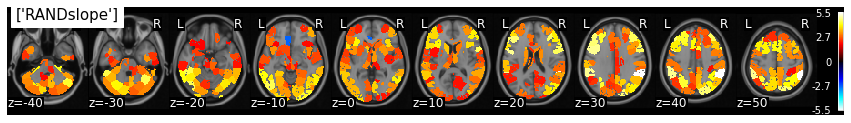

In [7]:
movie_ind = 4
max_thr = .8
min_thr = .8
plotfig=1
max_rois_list, min_rois_list =  plot_figure_maxmin_movie(movie_ind, vidnames,tResp_movie_slope,pResp_movie_slope,
                                                  max_thr,min_thr, plotfig)

In [13]:
fileName = os.path.join(data_file_loc,'timecourses_run_norm','timecourse-all-movies.npy')
tc_all = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies

trials = np.arange(3,tc_all.shape[2]-1)
movie_ind = 4
movieTC = tc_all[:,:,trials,movie_ind] # nsubs * nnodes * ntimepts

In [14]:
movieTC.shape

(1049, 268, 28)

In [20]:
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
lbl = [str.upper(x[0:4]) for x in vidnames]

In [66]:
movieTC.shape

(1049, 268, 43)

## Identifying and plotting timecourses of specific nodes/ROIs

In [67]:
dict = eval(shen268['1'][0])
dict

{'coords': [14.083200000000005, 56.6944, -16.684799999999996],
 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}

In [68]:
dict.keys()

dict_keys(['coords', 'name'])

In [69]:
# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html

# find node with certain phrases
for i in range(268):
    dict = eval(shen268[str(i+1)][0])
    if (dict['name'].find('anterior') != -1) and (dict['name'].find('cingulate') != -1):
        print('node:',i+1, ',name:', dict['name'])

node: 5 ,name: 47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole
node: 15 ,name: 58.36% Cingulate_Gyrus_anterior_division; 41.00% Paracingulate_Gyrus
node: 28 ,name: 41.56% Paracingulate_Gyrus; 27.43% Superior_Frontal_Gyrus; 21.52% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex); 9.49% Cingulate_Gyrus_anterior_division
node: 83 ,name: 72.92% Cingulate_Gyrus_anterior_division; 26.74% Paracingulate_Gyrus
node: 134 ,name: 60.87% Subcallosal_Cortex; 15.60% Cingulate_Gyrus_anterior_division; 13.04% Paracingulate_Gyrus; 10.23% Frontal_Medial_Cortex
node: 138 ,name: 45.63% Paracingulate_Gyrus; 30.02% Frontal_Medial_Cortex; 17.84% Frontal_Pole; 6.52% Cingulate_Gyrus_anterior_division
node: 140 ,name: 59.08% Paracingulate_Gyrus; 22.05% Cingulate_Gyrus_anterior_division; 14.15% Frontal_Pole
node: 219 ,name: 63.37% Paracingulate_Gyrus; 30.73% Cingulate_Gyrus_anterior_division; 5.90% Superior_Frontal_Gyrus
